# HW2 Solution by Jun Hao Saw


## Part 1
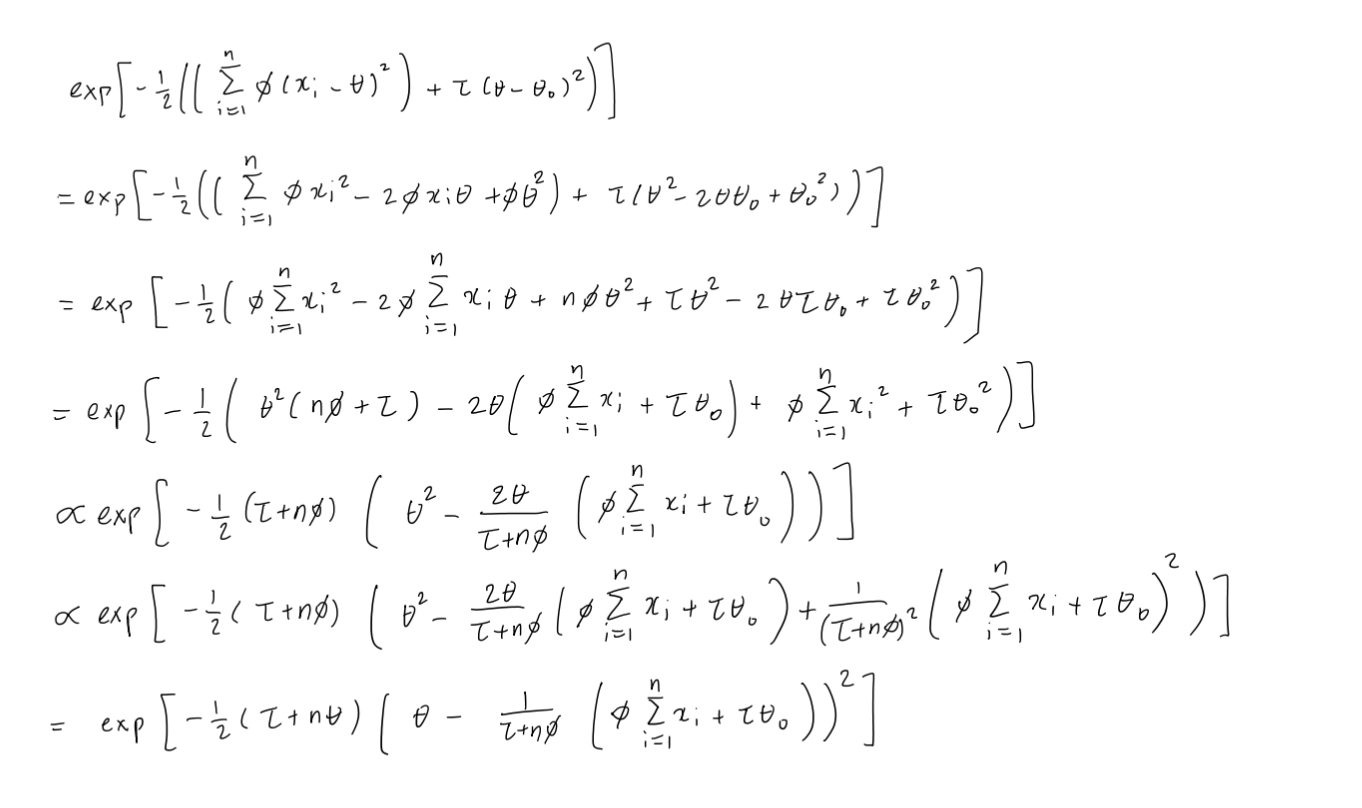

## Part 2

### Question 1

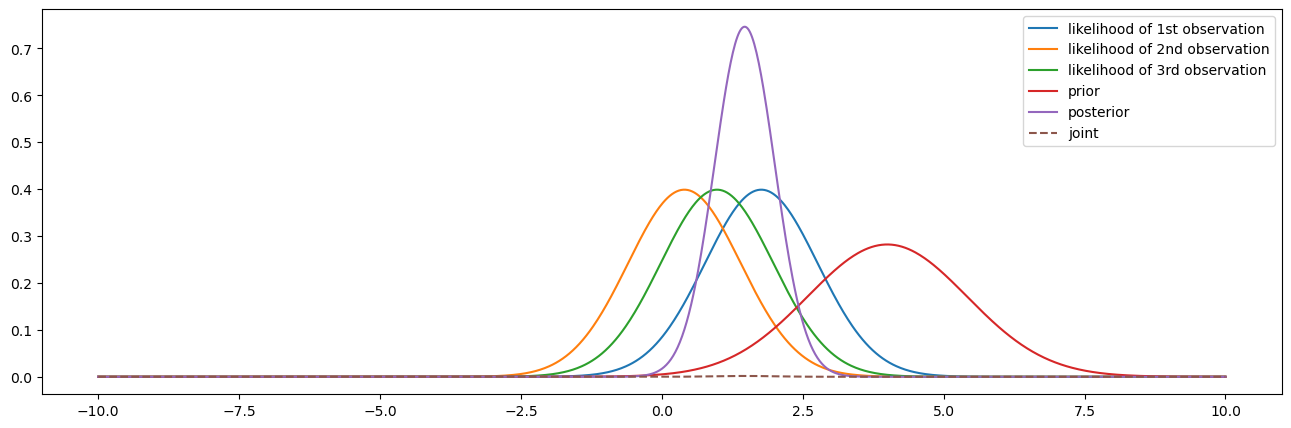

In [30]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

np.random.seed(0)

n = 3; theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001); 
x1 = stats.norm(loc=0,scale=1).rvs(1)[0];
x2 = stats.norm(loc=0,scale=1).rvs(1)[0];
x3 = stats.norm(loc=0,scale=1).rvs(1)[0];

likelihood1 = stats.norm.pdf(x1, loc=parameter_domain, scale=1)
likelihood2 = stats.norm.pdf(x2, loc=parameter_domain, scale=1)
likelihood3 = stats.norm.pdf(x3, loc=parameter_domain, scale=1)

prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)
joint = likelihood1*likelihood2*likelihood3*prior
posterior = stats.norm(loc=(tau*theta_0+(x1+x2+x3))/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)

plt.figure(figsize=(16,5)); 
plt.plot(parameter_domain, likelihood1,label="likelihood of 1st observation"); 
plt.plot(parameter_domain, likelihood2, label="likelihood of 2nd observation"); 
plt.plot(parameter_domain, likelihood3, label="likelihood of 3rd observation");
plt.plot(parameter_domain, prior, label="prior");
plt.plot(parameter_domain, posterior, label="posterior"); 
plt.plot(parameter_domain, joint, linestyle="--", label="joint"); 
plt.legend(); 


### Question 2

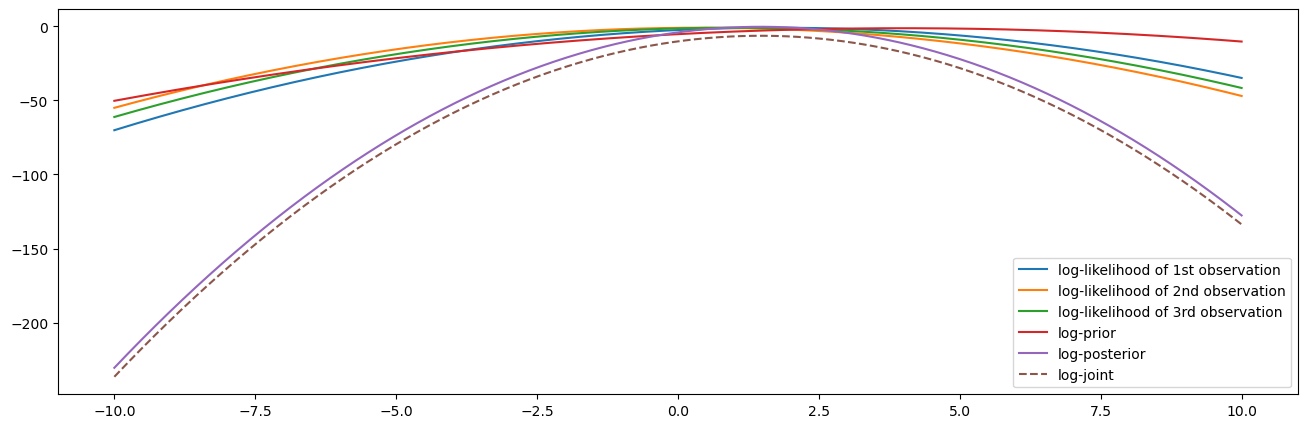

In [28]:
logl1 = stats.norm.logpdf(x1, loc=parameter_domain, scale=1)
logl2 = stats.norm.logpdf(x2, loc=parameter_domain, scale=1)
logl3 = stats.norm.logpdf(x3, loc=parameter_domain, scale=1)

log_prior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain)
log_posterior = stats.norm(loc=(tau*theta_0+(x1+x2+x3))/(tau+n), scale=1/(tau+n)**0.5).logpdf(parameter_domain)
log_joint = logl1+logl2+logl3+log_prior

plt.figure(figsize=(16,5)); 
plt.plot(parameter_domain, logl1,label="log-likelihood of 1st observation"); 
plt.plot(parameter_domain, logl2, label="log-likelihood of 2nd observation"); 
plt.plot(parameter_domain, logl3, label="log-likelihood of 3rd observation");
plt.plot(parameter_domain, log_prior, label="log-prior");
plt.plot(parameter_domain, log_posterior, label="log-posterior");
plt.plot(parameter_domain, log_joint, linestyle="--", label="log-joint"); 
plt.legend(); 


### Question 3

The posterior distribution of a normal likelihood with $p(\theta) \propto 1$ is a proper normal distribution. The derivation is similar to Part 1 but with a prior proportional to 1 instead.

### Question 4

 By Bayes' Theorem, we have that 
 \begin{align*}
 p(\theta|x) &= \dfrac{p(x|\theta)p(\theta)}{p(x)} \\
 &= \dfrac{C \cdot p(x|\theta)}{p(x)} \tag{since the prior is proportional to 1, $C \in \mathbb{R}$}
 \end{align*}
Taking logarithms of both sides,
\begin{align*}
 \log(p(\theta|x)) &= \log(\dfrac{C \cdot p(x|\theta)}{p(x)}) \\
 &= \log(C) + \log(p(x|\theta)) - \log(p(x)) \\
 \implies \log(p(x|\theta)) - \log(p(\theta|x))  &= \log(p(x)) - \log(C)
 \end{align*}